In [1]:
import tensorflow as tf 
from tensorflow import keras
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [4]:
df.shape

(7613, 5)

In [5]:
print((df.target == 1).sum()) # disaster
print((df.target == 0).sum()) # no disaster

3271
4342


In [6]:
# Preprocessing

import re # Regular Expression
import string

def remove_url(text):
    url = re.compile(r"https?://\S+|www\.\S+")
        
    return url.sub(r"", text)

def remove_punc(text):
    translator = str.maketrans("", "", string.punctuation)
    return text.translate(translator)

string.punctuation


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [7]:
pattern = re.compile(r"https?://(\S+|www)\.\S+")
for t in df.text:
    matches = pattern.findall(t)
    for match in matches:
        print("1")
        print(t)
        print("2")
        print(match)
        print("3")
        print(pattern.sub(r"", t))
    if len(matches) > 0:
        break

1
@bbcmtd Wholesale Markets ablaze http://t.co/lHYXEOHY6C
2
t
3
@bbcmtd Wholesale Markets ablaze 


In [8]:
df['text'] = df.text.map(remove_url)        # map(lambda x: remove_url(x))
df['text'] = df.text.map(remove_punc)
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this earthquake Ma...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask Canada,1
2,5,NaN,NaN,All residents asked to shelter in place are be...,1
3,6,NaN,NaN,13000 people receive wildfires evacuation orde...,1
4,7,NaN,NaN,Just got sent this photo from Ruby Alaska as s...,1


In [9]:
# remove stopwords 
# (Stopwords are the English words which does not add much meaning to a sentence. They can safely be ignored without sacrificing the meaning of the sentence. For example, the words like the, he, have etc. Such words are already captured this in corpus named corpus.
import nltk
from nltk.corpus import stopwords

stop = set(stopwords.words("english"))

def remove_stopwords(text):
    filtered_words = [word.lower() for word in text.split() if word.lower() not in stop]
    return " ".join(filtered_words)

In [10]:
df["text"] = df.text.map(remove_stopwords)
df.text

0            deeds reason earthquake may allah forgive us
1                   forest fire near la ronge sask canada
2       residents asked shelter place notified officer...
3       13000 people receive wildfires evacuation orde...
4       got sent photo ruby alaska smoke wildfires pou...
                              ...                        
7608    two giant cranes holding bridge collapse nearb...
7609    ariaahrary thetawniest control wild fires cali...
7610                      m194 0104 utc5km volcano hawaii
7611    police investigating ebike collided car little...
7612    latest homes razed northern california wildfir...
Name: text, Length: 7613, dtype: object

In [11]:
from collections import Counter

# Count unique words
def counter_word(text_col):
    count = Counter()
    for text in text_col.values:
        for word in text.split():
            count[word] += 1
    return count

counter = counter_word(df.text)

In [12]:
len(counter)

17971

In [13]:
# counter

In [14]:
counter.most_common(5)

[('like', 345), ('im', 299), ('amp', 298), ('fire', 250), ('get', 229)]

In [15]:
num_unique_words = len(counter)
print(num_unique_words)

17971


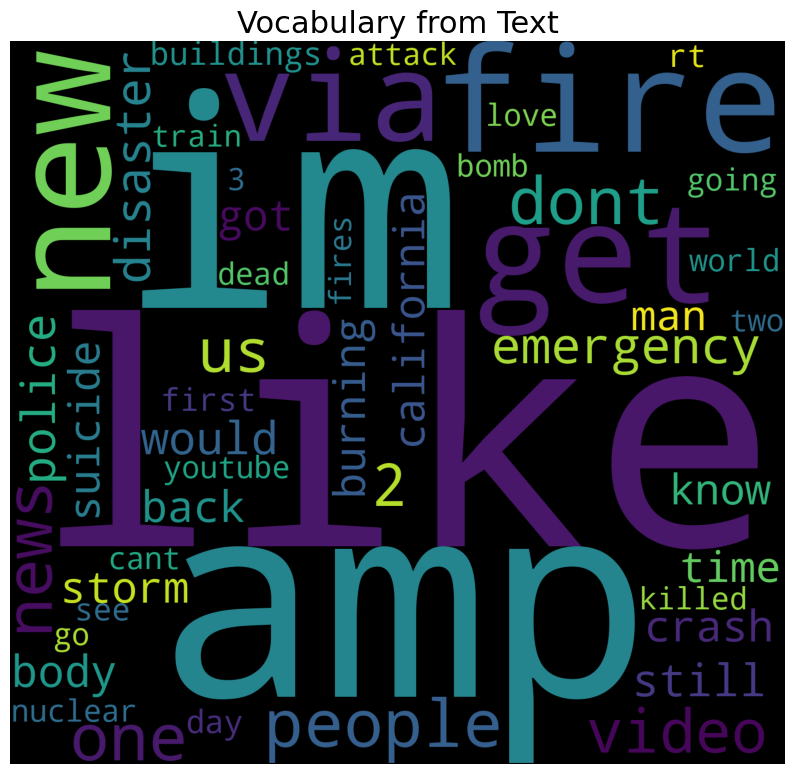

In [17]:
from wordcloud import WordCloud
word_cloud = WordCloud(background_color='black', width=1500, height=1400).generate_from_frequencies(dict(counter.most_common(50)))
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(word_cloud)
plt.title("Vocabulary from Text", fontsize = 22);

In [18]:
train_size = int(df.shape[0] * 0.8)
train_df = df[:train_size] # train_df contains 80% of the rows.

val_df = df[train_size:]  # val_df contains the remaining 20% of the rows.

train_sentence = train_df.text.to_numpy()
train_labels = train_df.target.to_numpy()
val_sentence = val_df.text.to_numpy()
val_labels = val_df.target.to_numpy()

In [19]:
print(train_sentence.shape, val_sentence.shape)
print(train_sentence,"\n",val_sentence)

(6090,) (1523,)
['deeds reason earthquake may allah forgive us'
 'forest fire near la ronge sask canada'
 'residents asked shelter place notified officers evacuation shelter place orders expected'
 ... 'feel like sinking unhappiness take quiz'
 'sinking music video tv career brooke hogan thanking dad free publicityalthough doubt help'
 'supernovalester feel bad literally feel feeling heart sinking bc didnt get anyone ugh jfc'] 
 ['nowplaying sinking fast never north east unsigned radio listen'
 'horrible sinking feeling you\x89ûªve home phone realise 3g whole time'
 'nigga car sinking snapping fox 13 priorities' ...
 'm194 0104 utc5km volcano hawaii'
 'police investigating ebike collided car little portugal ebike rider suffered serious nonlife threatening injuries'
 'latest homes razed northern california wildfire abc news']


In [32]:
# tokenize 

from tensorflow.keras.preprocessing.text import Tokenizer

# vectorize a text corpus by turning each text into a sequence of interger
tokenizer = Tokenizer(num_words=num_unique_words)
tokenizer.fit_on_texts(train_sentence)  # fit only to training

In [33]:
# each word has unique index
word_index = tokenizer.word_index

In [34]:
word_index

{'like': 1,
 'amp': 2,
 'fire': 3,
 'im': 4,
 'get': 5,
 'via': 6,
 'new': 7,
 'people': 8,
 'news': 9,
 'dont': 10,
 'emergency': 11,
 'one': 12,
 '2': 13,
 'us': 14,
 'video': 15,
 'disaster': 16,
 'burning': 17,
 'body': 18,
 'would': 19,
 'buildings': 20,
 'police': 21,
 'crash': 22,
 'first': 23,
 'california': 24,
 'still': 25,
 'man': 26,
 'got': 27,
 'know': 28,
 'day': 29,
 'back': 30,
 'going': 31,
 'two': 32,
 'time': 33,
 'full': 34,
 'accident': 35,
 'see': 36,
 'world': 37,
 'attack': 38,
 'nuclear': 39,
 'youtube': 40,
 'may': 41,
 'love': 42,
 'go': 43,
 'rt': 44,
 'many': 45,
 'cant': 46,
 '3': 47,
 'watch': 48,
 'collapse': 49,
 'dead': 50,
 'today': 51,
 'car': 52,
 'mass': 53,
 'want': 54,
 'years': 55,
 'work': 56,
 'train': 57,
 'last': 58,
 'good': 59,
 'think': 60,
 'families': 61,
 'hiroshima': 62,
 'life': 63,
 'fires': 64,
 'best': 65,
 'could': 66,
 'say': 67,
 'u': 68,
 'death': 69,
 'hot': 70,
 'forest': 71,
 'way': 72,
 'killed': 73,
 'need': 74,
 'legion

In [35]:
train_sequence = tokenizer.texts_to_sequences(train_sentence)
val_sequence = tokenizer.texts_to_sequences(val_sentence)

In [36]:
print(train_sentence[0:5])
print(train_sequence[0:5])

['deeds reason earthquake may allah forgive us'
 'forest fire near la ronge sask canada'
 'residents asked shelter place notified officers evacuation shelter place orders expected'
 '13000 people receive wildfires evacuation orders california'
 'got sent photo ruby alaska smoke wildfires pours school']
[[3739, 696, 235, 41, 1282, 3740, 14], [71, 3, 129, 576, 5670, 5671, 1283], [1448, 1186, 1882, 495, 5672, 1449, 116, 1882, 495, 976, 1187], [2243, 8, 3741, 1070, 116, 976, 24], [27, 1071, 358, 5673, 1635, 892, 1070, 5674, 91]]


In [37]:
# pad the sentence to have the same length
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Maximum number of words in a suquence
max_length = 20

train_padded = pad_sequences(train_sequence, maxlen=max_length, padding="post", truncating="post")
val_padded = pad_sequences(val_sequence, maxlen=max_length, padding="post", truncating="post")
train_padded.shape, val_padded.shape

((6090, 20), (1523, 20))

In [38]:
train_padded[0]

array([3739,  696,  235,   41, 1282, 3740,   14,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0])

In [39]:
print(train_sentence[10])
print(train_sequence[10])
print(train_padded[10])

three people died heat wave far
[520, 8, 395, 156, 297, 411]
[520   8 395 156 297 411   0   0   0   0   0   0   0   0   0   0   0   0
   0   0]


In [40]:
# Check reversing the indices

# flip key, values
reverse_word_index = dict([(idx, word) for word, idx in word_index.items()])

In [41]:
 reverse_word_index

{1: 'like',
 2: 'amp',
 3: 'fire',
 4: 'im',
 5: 'get',
 6: 'via',
 7: 'new',
 8: 'people',
 9: 'news',
 10: 'dont',
 11: 'emergency',
 12: 'one',
 13: '2',
 14: 'us',
 15: 'video',
 16: 'disaster',
 17: 'burning',
 18: 'body',
 19: 'would',
 20: 'buildings',
 21: 'police',
 22: 'crash',
 23: 'first',
 24: 'california',
 25: 'still',
 26: 'man',
 27: 'got',
 28: 'know',
 29: 'day',
 30: 'back',
 31: 'going',
 32: 'two',
 33: 'time',
 34: 'full',
 35: 'accident',
 36: 'see',
 37: 'world',
 38: 'attack',
 39: 'nuclear',
 40: 'youtube',
 41: 'may',
 42: 'love',
 43: 'go',
 44: 'rt',
 45: 'many',
 46: 'cant',
 47: '3',
 48: 'watch',
 49: 'collapse',
 50: 'dead',
 51: 'today',
 52: 'car',
 53: 'mass',
 54: 'want',
 55: 'years',
 56: 'work',
 57: 'train',
 58: 'last',
 59: 'good',
 60: 'think',
 61: 'families',
 62: 'hiroshima',
 63: 'life',
 64: 'fires',
 65: 'best',
 66: 'could',
 67: 'say',
 68: 'u',
 69: 'death',
 70: 'hot',
 71: 'forest',
 72: 'way',
 73: 'killed',
 74: 'need',
 75: 'le

In [42]:
def decode(sequence):
    return ' '.join([reverse_word_index.get(idx, "?") for idx in sequence])

In [43]:
decode_text = decode(train_sequence[10])
print(train_sequence[10])
print(decode_text)

[520, 8, 395, 156, 297, 411]
three people died heat wave far


In [73]:
# Create LSTM Model
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Dropout
from keras.layers import Embedding
# Embedding: https://www.tensorflow.org/tutorials/text/word_embeddings
# Turns positive integers (indexes) into dense vectors of fixed size. (other approach could be one-hot-encoding)

model = Sequential()
model.add(Embedding(num_unique_words, 32, input_length=max_length))

# The layer will take as input an integer matrix of size (batch, input_length)
# and  the largest integer (i.e. word index) in the input should be no longer than num_words (vocabulary size)
# Now model.output_shape is (None, input_length, 32), where None is tha batch dimension

model.add(LSTM(64, dropout=0.1))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 20, 32)            575072    
                                                                 
 lstm_1 (LSTM)               (None, 64)                24832     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 599969 (2.29 MB)
Trainable params: 599969 (2.29 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [74]:
loss = keras.losses.BinaryCrossentropy(from_logits=False)
optim = keras.optimizers.Adam(lr=0.001)
metrics = ['accuracy']

model.compile(loss=loss, optimizer=optim, metrics=metrics)

In [75]:
model.fit(train_padded, train_labels, epochs=20, validation_data=(val_padded, val_labels), verbose=2)
# verbose=2: Displays one line per epoch, which includes metrics such as loss and accuracy.

Epoch 1/20
191/191 - 14s - loss: 0.5503 - accuracy: 0.7069 - val_loss: 0.4625 - val_accuracy: 0.7958 - 14s/epoch - 71ms/step
Epoch 2/20
191/191 - 7s - loss: 0.2847 - accuracy: 0.8929 - val_loss: 0.5032 - val_accuracy: 0.7820 - 7s/epoch - 35ms/step
Epoch 3/20
191/191 - 6s - loss: 0.1582 - accuracy: 0.9456 - val_loss: 0.7082 - val_accuracy: 0.7551 - 6s/epoch - 33ms/step
Epoch 4/20
191/191 - 6s - loss: 0.1100 - accuracy: 0.9672 - val_loss: 0.8421 - val_accuracy: 0.7406 - 6s/epoch - 33ms/step
Epoch 5/20
191/191 - 6s - loss: 0.0887 - accuracy: 0.9736 - val_loss: 0.7673 - val_accuracy: 0.7360 - 6s/epoch - 32ms/step
Epoch 6/20
191/191 - 6s - loss: 0.0747 - accuracy: 0.9749 - val_loss: 0.7287 - val_accuracy: 0.7446 - 6s/epoch - 31ms/step
Epoch 7/20
191/191 - 6s - loss: 0.0640 - accuracy: 0.9778 - val_loss: 0.8091 - val_accuracy: 0.7374 - 6s/epoch - 33ms/step
Epoch 8/20
191/191 - 6s - loss: 0.0525 - accuracy: 0.9801 - val_loss: 0.9744 - val_accuracy: 0.7354 - 6s/epoch - 32ms/step
Epoch 9/20
191

In [76]:
predictions = model.predict(train_padded)
predictions = [1 if p> 0.5 else 0 for p in predictions]

191/191 [==============================] - 3s 10ms/step


In [77]:
print(train_sentence[10:20])

['three people died heat wave far'
 'haha south tampa getting flooded hah wait second live south tampa gonna gonna fvck flooding'
 'raining flooding florida tampabay tampa 18 19 days ive lost count'
 'flood bago myanmar arrived bago'
 'damage school bus 80 multi car crash breaking' 'whats man' 'love fruits'
 'summer lovely' 'car fast' 'goooooooaaaaaal']


In [78]:
print(train_labels[10:20])
print(predictions[10:20])

[1 1 1 1 1 0 0 0 0 0]
[1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
